In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
!pip uninstall -y scikit-learn imbalanced-learn
!pip install scikit-learn==1.5.2 imbalanced-learn==0.12.4

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 12.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


 # import library

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Loading & Checking The data¶

In [4]:
path= '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### algorithm decide based on dataset output(churn column)
# Machine Learning Algorithm Cheat Sheet

When starting a project, look at your **Target Column** to decide the Task and Algorithm.

| **If your Target Column is...** | **The Task is called...** | **The Algorithms you pick from are...** |
| :--- | :--- | :--- |
| **A Category / Label**<br>*(e.g., Churn = Yes/No, Spam = 0/1)* | <span style="background-color:#cce5ff; color:black; padding:4px; border-radius:4px;">**CLASSIFICATION**</span> | • Logistic Regression<br>• Random Forest Classifier<br>• Decision Tree Classifier |
| **A Continuous Number**<br>*(e.g., Price = 250.50, Temp = 72.1)* | <span style="background-color:#e2f0cb; color:black; padding:4px; border-radius:4px;">**REGRESSION**</span> | • Linear Regression<br>• Random Forest Regressor<br>• Decision Tree Regressor |
| **No Target Column**<br>*(Just raw data)* | <span style="background-color:#ffe5e5; color:black; padding:4px; border-radius:4px;">**CLUSTERING**</span> | • K-Means<br>• DBSCAN |

> **📌 Note for Data Analysts:** > * Use **Linear/Logistic Regression** when you need to explain *why* something happens (Interpretability).
> * Use **Random Forest** when you need the highest possible *accuracy* (Performance).



In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


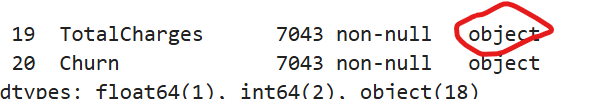     total charges  column mee integer value hai but but it show string(object)

 # Removing unnecessary column

In [9]:
df=df.drop(['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploring Unique Values in Categorical Columns
these three columns ->'tenure' ,'MonthlyCharges' , 'TotalCharges' has only integer value remainig have **binary and categorical**

In [10]:
interger_column = ['tenure' ,'MonthlyCharges' , 'TotalCharges' ]
for i in df.columns:
    if i not  in interger_column:
        print(i, df[i].unique())
        print("-"*50)
        

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

# Checking for Missing Values

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Viewing TotalCharges Column Values

In [12]:
 #df['TotalCharges']
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df['TotalCharges']==' '

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


**brother  TotalCharges column me string and blank value hai . blank ki jagah 0 put karna ye target hai**

In [15]:
len(df[df['TotalCharges']==' '])


11

In [16]:
df['TotalCharges'] = df['TotalCharges'].replace({' ': '0.0'})

In [17]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [18]:
# 0 are replaced in place of blank 
df.loc[488 ,'TotalCharges']

0.0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Visualizing Churn Distribution 📊¶
visualize catorgical column

In [20]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: ylabel='Churn'>

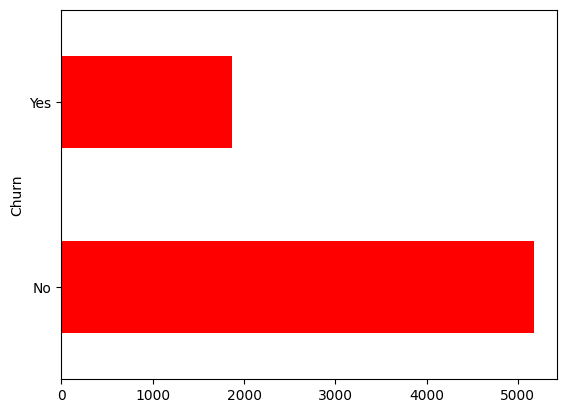

In [21]:
df['Churn'].value_counts().plot(kind='barh' , color='red')

# Exploratory Data Analysis (EDA) 🔍📊
-**Data Inspection and Cleaning  :**  df.head(), df.info() , df.isnull().sum()

-**Statistical Calculations (Univariate & Bivariate)**:df['col'].value_counts() , df.groupby('category_col')['target_col'].mean()

-**Data Visualization**  Histogram: sns.histplot(df['col'])  ,  Box Plot : 


In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


  ## Kernel Density Estimation (KDE) Plots for Churn Analysis
  i have only 3 integer column -> tenure , MonthlyCharges , TotalCharges  viusalize it 

  kde: Data ka ek smooth curve (shape) banana.

**plt.figure(figsize=(9, 4)):** Ye line graph banane ke liye ek khali canvas (drawing sheet) taiyar karti hai.
 
**figsize=(9, 4):** Ye canvas ka size decide karta hai.

* 9: Graph ki Width (chaudai).

* 4: Graph ki Height (unchai).

**plt.title(f"KDE for {feature}")**

Matlab: Ye graph ke upar ek Heading (Title) likhta hai.

**f"..." (f-string):** Ye Python ka ek smart tarika hai text ke andar variable daalne ka.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


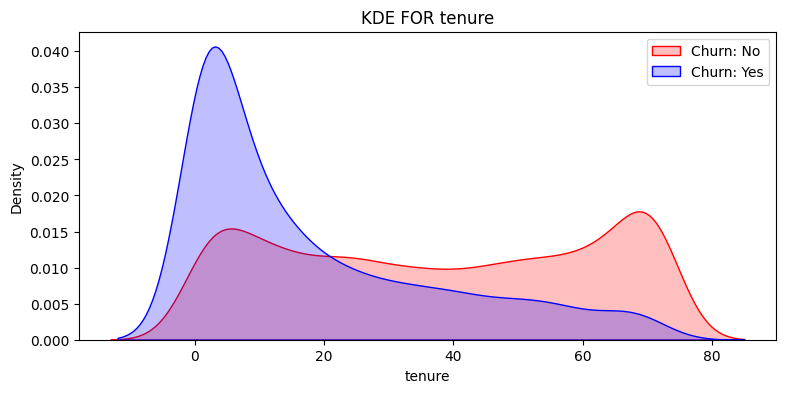

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


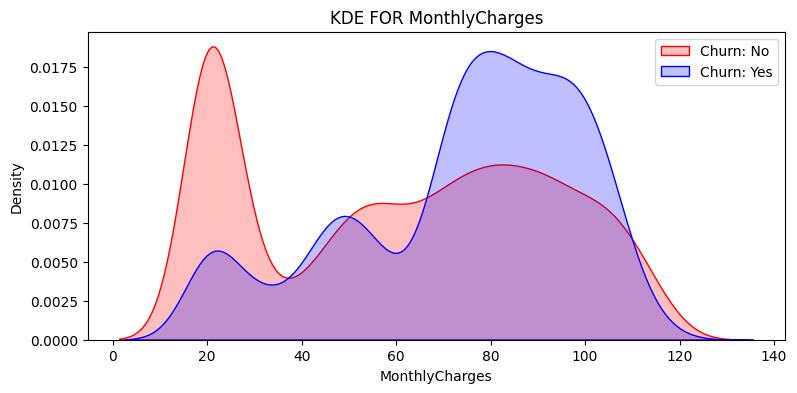

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


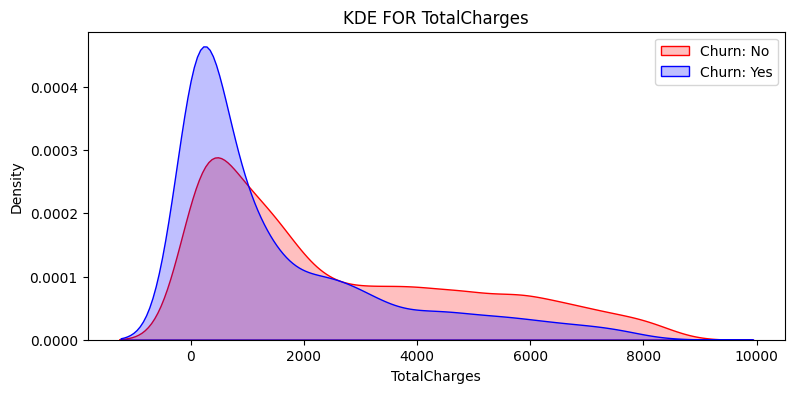

In [24]:
def kdeplot(feature):
    plt.figure(figsize=(9,4))
    plt.title(f"KDE FOR {feature}")

    ax0= sns.kdeplot(
         df[df['Churn']=='No'] # ye sirf un logon ko filter kar raha hai jo Loyal hain (Jinhone Churn nahi kiya).
         [feature].dropna() , #dropna() un NaN(khali values) ko hata deta hai taaki graph clean bane.
         color='red',
         label='Churn: No',#Ye side mein chhota sa box (Legend) banayega jo batayega ki "Laal rang ka matlab Churn: No hai".
         fill=True #Line ke niche rang bhar diya taaki wo solid dikhe (sirf patli line nahi).                                    
    )
    ax1= sns.kdeplot(
         df[df['Churn']=='Yes']
         [feature].dropna(),
         color= 'blue',
          label= 'Churn: Yes',
          fill=True   
    ) 
    # Comparison Logic (Ax0 vs Ax1)
    # Ab dekhiye aapne yahi cheez do baar kyun ki:
    
    # Ax0 (Red): Sirf Loyal customers ka graph banaya.
    
    # Ax1 (Blue): Sirf Churned customers (df['Churn'] == 'Yes') ka graph banaya.

    plt.legend()
    plt.show()




kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

## Churn Distribution by Contract Type
Contract column is string based  column 

In [25]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


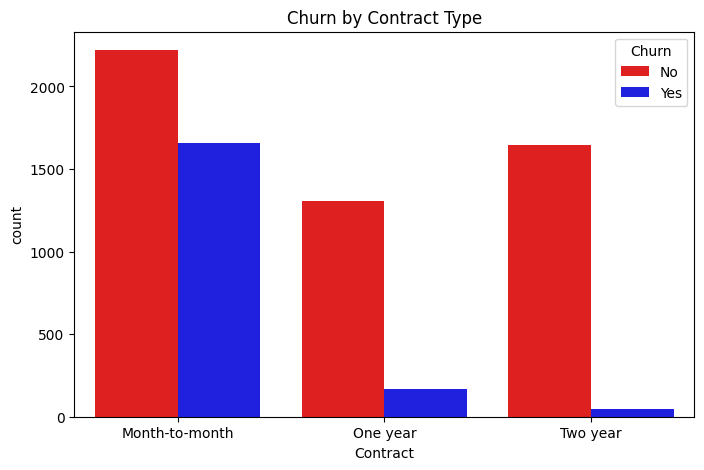

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract' , hue='Churn' , data=df , palette=['red', 'blue'] )
plt.title('Churn by Contract Type')
plt.show()

## Monthly Charges Distribution by Churn 💰📊

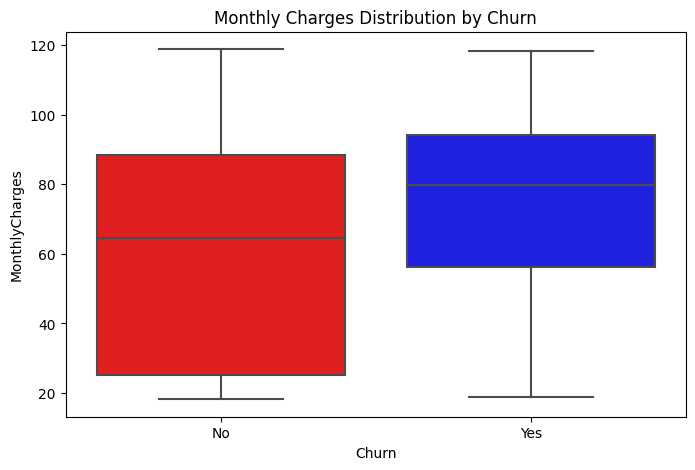

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn' , y='MonthlyCharges' , data=df , palette=['red','blue'])
plt.title('Monthly Charges Distribution by Churn')
plt.show()


## Churn Distribution by Internet Service Type 🌐📊

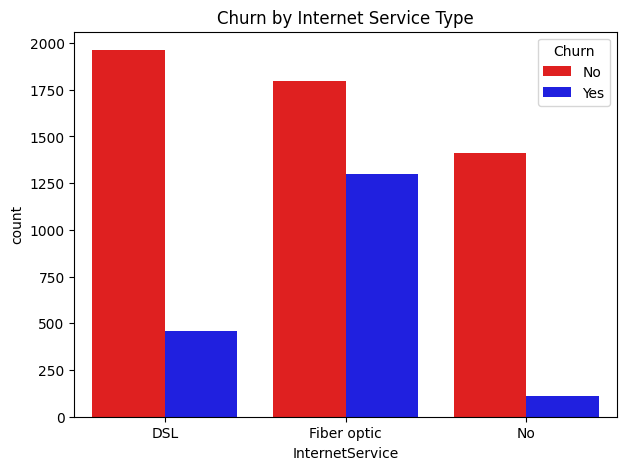

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x='InternetService' , hue='Churn' , data=df , palette=['red', 'blue'])
plt.title('Churn by Internet Service Type')
plt.show()

## Churn Distribution by Payment Method 💳📊

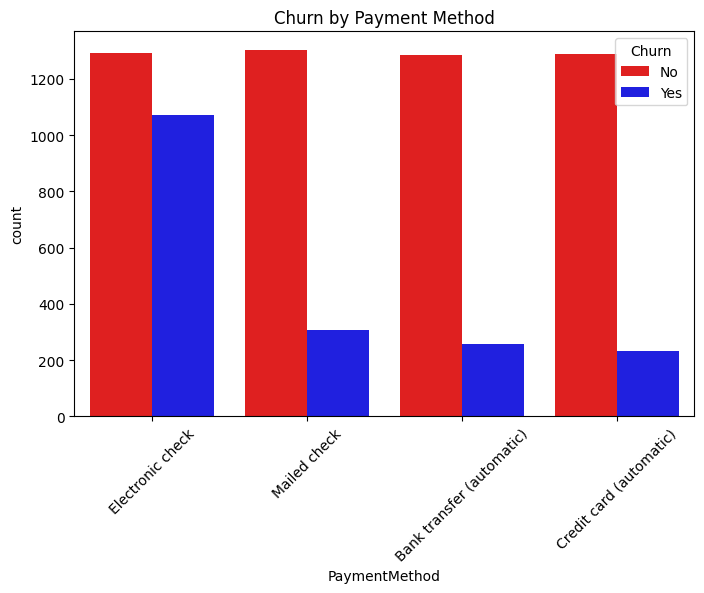

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod' , hue='Churn' , data=df, palette=['red', 'blue'])
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.show()

## Correlation Heatmap of Numerical Features 🔥📊

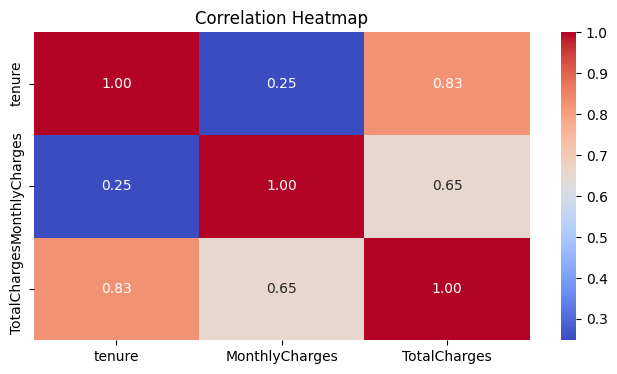

In [30]:
plt.figure(figsize=(8,4))
li=['tenure' , 'MonthlyCharges' , 'TotalCharges']
sns.heatmap(df[li].corr() , annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**finally i completed EDA  and now we move on to create a model  first thing we need model understand only integer value so convert all value into integer**

In [31]:
li=['MonthlyCharges' , 'TotalCharges' , 'tenure']
for i in df.columns:
    if i not in li:
        print(i , df[i].unique())
        print('-'*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

# Cleaning Categorical Columns for Consistency 🧹🔄

**inplace=True** ka seedha matlab hai: **"Original data ko permanently change kar do."**

Jab aap Pandas mein koi change karte hain (jaise replace, drop, rename), toh Pandas by default **asli data (df) ko haath nahi lagata**. Wo bas ek temporary copy banata hai aur usme change karke dikha deta hai.

Agar aap chahte hain ki change Asli DataFrame mein save ho jaye, toh hum inplace=True likhte hain.

In [32]:
# Replacing 'No phone service' -->> NO
# Replacing 'No internet Service' -->> No
df['MultipleLines'].replace('No phone service' , 'No', inplace=True)
df['OnlineSecurity'].replace('No internet service', 'No' , inplace=True)
df['OnlineBackup'].replace('No internet service', 'No' , inplace=True)
df['DeviceProtection'].replace('No internet service', 'No' , inplace=True)
df['TechSupport'].replace('No internet service', 'No' , inplace=True)
df['StreamingTV'].replace('No internet service', 'No' , inplace=True)
df['StreamingMovies'].replace('No internet service', 'No' , inplace=True)


/tmp/ipykernel_13/1056701321.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MultipleLines'].replace('No phone service' , 'No', inplace=True)
/tmp/ipykernel_13/1056701321.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

## Converting Yes/No Columns to Binary (0/1) 🔢✅

In [33]:
for i in df.columns:
    print(i, df[i].unique())
    print('-'*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes']
--------------------------------------------------
OnlineBackup ['Yes' 'No']
--------------------------------------------------
DeviceProtection ['

In [34]:
yes_no_col = ['Partner' ,'Dependents' ,'PhoneService' ,'MultipleLines',
              'OnlineSecurity', 'OnlineBackup' , 'DeviceProtection' , 
              'TechSupport' , 'StreamingTV' ,'StreamingMovies' ,
              'PaperlessBilling' , 'Churn'  ]
for i in yes_no_col:
    df[i].replace({'Yes':1, 'No':0},inplace=True)

/tmp/ipykernel_13/2281224875.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace({'Yes':1, 'No':0},inplace=True)
/tmp/ipykernel_13/2281224875.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].replace({'Yes':1, 'No':0},inplace=True)


In [35]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [36]:
df['gender'].replace({'Female':1 , 'Male':0},inplace=True)
    

/tmp/ipykernel_13/2357928845.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female':1 , 'Male':0},inplace=True)
/tmp/ipykernel_13/2357928845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female':1 , 'Male':0},inplace=True)


**Mera Suggestion:** Confusion se bachne ke liye "Yes" ko hamesha 1 aur "No" ko hamesha 0 rakhna sabse safe aur standard tarika hai. Gender mein aap jo chahein wo karein

**Target Variable ke liye (Sabse Important Rule) ⚠️**                                   Jis cheez ko hum dhoondh rahe hain (Positive Case), usse 1 dete hain.

Jo normal hai (Negative Case), usse 0 dete hain.

**Churn Analysis mein:**

Churn = 'Yes' (Bhaag gaya) → Isse 1 dena chahiye.

Churn = 'No' (Ruk gaya) → Isse 0 dena chahiye.

In [37]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


# Encoding Categorical Variables using One-Hot Encoding 🎭📊

Now finally we convert whole data into 0/1 form but some columns are remaining beocuse they have **more than 2 unique categorical values** in this case we used **One-Hot Encoding**

In [38]:
li=['InternetService' ,'Contract' , 'PaymentMethod' ]
for i in li:
    print(df[i].unique())
    print('-'*50)

['DSL' 'Fiber optic' 'No']
--------------------------------------------------
['Month-to-month' 'One year' 'Two year']
--------------------------------------------------
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
--------------------------------------------------


In [39]:
li=['InternetService' ,'Contract' , 'PaymentMethod']
df2 = pd.get_dummies(data=df , columns = li  ,  dtype=int )

**Dummy Variable Trap:** Trap ye hai ki aap machine ko Extra Information de rahe hain jo calculation kharab kar rahi hai. **drop_first=True** us extra information ko hata kar model ko safe rakhta hai. and Technical bhaasha mein isse Perfect **Multicollinearity** kehte hain.Jab DSL=0 aur Fiber=0 hota hai, toh machine "Chupchap" samajh jaati hai ki ye teesra wala category hai. Aapko bolne ki zaroorat nahi padti.

In [40]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [41]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [42]:
for i in df2.columns:
    print(i,df2[i].unique())
    print('-'*50)

gender [1 0]
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner [1 0]
--------------------------------------------------
Dependents [0 1]
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService [0 1]
--------------------------------------------------
MultipleLines [0 1]
--------------------------------------------------
OnlineSecurity [0 1]
--------------------------------------------------
OnlineBackup [1 0]
--------------------------------------------------
DeviceProtection [0 1]
--------------------------------------------------
TechSupport [0 1]
--------------------------------------------------
StreamingTV [0 1]
------

**finally i have converted  all categorical data into 0/1 formet except numerical ( tenure , monthlychages , totalchages)**

# Scaling Numerical Features using MinMaxScaler 📏🔄

**MinMaxScaler:**  Yeh Machine Learning mein Data Preprocessing ka ek bahut important hissa hai.ska main kaam hai aapke data ki values ko ek specific range mein (usually 0 aur 1 ke beech) "scale" ya convert karna.
**Iski Zaroorat Kyun Hai? (The Why)** Imagine karo aapke paas ek dataset hai jisme do columns hain:

* Age: 20 se 60 saal.

* Salary: 20,000 se 1,00,000 rupaye.

Machine Learning models (jaise KNN ya Gradient Descent wale algorithms) numbers ko compare karte hain. Kyunki Salary ke numbers Age se bahut bade hain, model ko lagega ki Salary zyada important hai, jo ki galat ho sakta hai.

MinMaxScaler **inn dono ko 0 se 1 ki range** mein le aata hai taaki dono barabar (equal) importance rakhein. Ise **Normalization** bhi kehte hain.
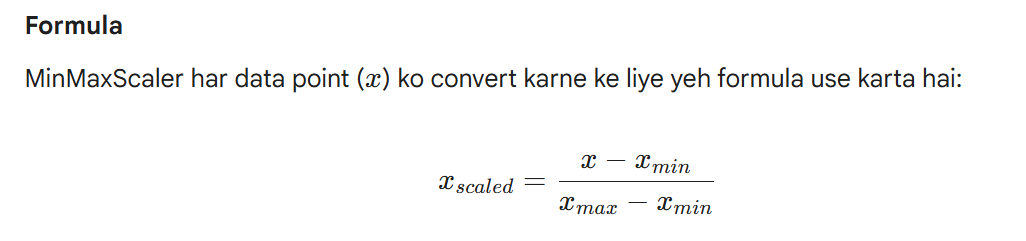
$x$: Original value (jo abhi hum convert kar rahe hain)


$x_{min}$: Uss column (feature) ki sabse chhoti value. 


$x_{max}$: Uss column ki sabse badi value

Maan lijiye aapke paas yeh chhota sa dataset hai: [10, 20, 30, 40, 50].

Yahan:Sabse chhoti value ($x_{min}$) = 10

Sabse badi value ($x_{max}$) = 50

In [43]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

suppose if do scaler.fit_transform(cols_to_scale) -> output show cannot convert string to float becouse ess cols_to_scale list ki values aa rahi hai naa ki numerical values a rahi hai 

In [44]:
# Checking Vlaues now
for i in df2.columns:
    print(f"{i}: {df2[i].unique()}")
    

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: 

# congratulation🥳🎉👏 you trasnform data(catgorical , integer) to bolean data[0,1]

# start creating model 
this time your dataset are ready to feed in model 
datset: df2 

# Splitting Features and Target Variable ✂️🎯

In [45]:
# splitting the features and target
x=df2.drop(columns=['Churn'])
y=df2['Churn']

In [46]:
# split training and test data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=42)

**random_state=42** ka main kaam hai **reproducibility**—yani ki aapka code jab bhi run ho, woh har baar same result de.

**Without random_state:** Agar main aapse kahu "cards ko shuffle karo," toh aap har baar alag tarike se shuffle karoge. Pehli baar jo patta upar aaya, agli baar shayad woh neeche ho. Machine Learning mein bhi jab hum data ko train aur test mein baant-te (split karte) hain, toh woh randomly hota hai.


**With random_state=42:** Ab imagine karo ki humne ek rule bana diya—ek specific tarike se hi shuffle karna hai. Jaise: "Hamesha teesra patta uthakar sabse upar rakho." Agar hum yeh 'rule' (jo ki random_state hai) fix kar dein, toh main jitni baar bhi shuffle karunga, cards ka order exactly same rahega.
random_state=42 bas computer ko yeh batata hai ki "randomness" ko kis point se shuru karna hai, taaki aapka aur mera result same aaye


## 📉 Real Impact (Asli Asar)

Agar aap `random_state` use nahi karte (yaani ise `None` chhod dete hain), toh kya problem aa sakti hai?

> **Scenario:** Imagine karo aap aur main ek hi project par kaam kar rahe hain.

### ❌ Without random_state
* **Maine code run kiya:** Mere model ki accuracy aayi **85%**.
* **Aapne wahi same code run kiya:** Aapki accuracy aayi **82%**.
* **Problem:** Humaara data split alag-alag hua (kyunki computer ne har baar naye random patte/data points uthaye). Ab hum confusion mein hain—kya mera model sach mein behtar hai, ya bas mujhe aasaan data mil gaya tha?

### ✅ With random_state
* **Action:** Hum dono ne `random_state=42` set kiya.
* **Result:** Ab chahe main run karoon ya aap, humara data **exactly same** tarike se split hoga.
* **Benefit:** Agar humare results alag aate hain, toh humein pakka pata hoga ki model mein kuch change hua hai, data mein nahi.

---
**Conclusion:** Isiliye **Experimentation** aur **Debugging** ke time par `random_state` fix karna zaroori hota hai taaki hum apne results par bharosa kar sakein.

In [47]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


# Handling Imbalanced Data using SMOTE ⚖️🔄
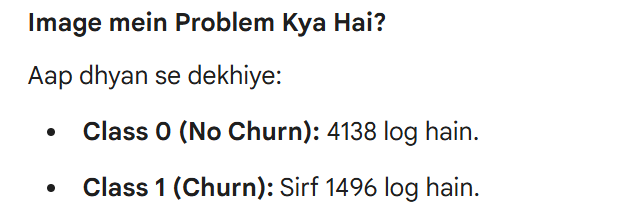
Yahan 0 wali category 1 wali se lagbhag 3 guna badi hai. Jab data mein ek category doosri se bahut zyada hoti hai, toh usse hum **Class Imbalance** kehte hain

## SMOTE Kya Hai?
SMOTE ka full form hai: Synthetic Minority Over-sampling Technique.

Seedhi bhasha mein: Jab humare paas kisi category ka data kam hota hai (jaise yahan '1' wala data kam hai), toh SMOTE us kam wale data ki "copy" nahi karta, balki uske jaise naye aur nakli (synthetic) examples banata hai. Isse dono categories ka count barabar ho jata hai.

## SMOTE ki Need Kyun Hai?
Isse samajhne ke liye ek chhota sa sawaal:

Maan lijiye aapko ek exam dena hai jisme 2 chapters aayenge.

* Chapter A ke liye aapke paas 100 pages ke notes hain.

* Chapter B ke liye aapke paas sirf 10 pages ke notes hain

Agar aap sirf in notes se padhke exam dene chale jayein, toh aap kis chapter ke sawalon ka jawab zyada ache se de payenge?
Agar aapke paas **Chapter A** ke 100 pages hain, toh aap uski details zyada ache se samajh payenge. Lekin **Chapter B ke** sirf 10 pages hain, toh exam mein uske sawal aane par aap atak sakte hain kyunki aapke paas information kam thi.

yahi same cheez aapke model ke saath ho rahi hai:

* Class 0 (4138 data points): Model ne isse khoob "padha" hai, toh isse pehchanne mein woh expert hai.

* Class 1 (1496 data points): Iska data kam hai, isliye model isse theek se nahi seekh pa raha.

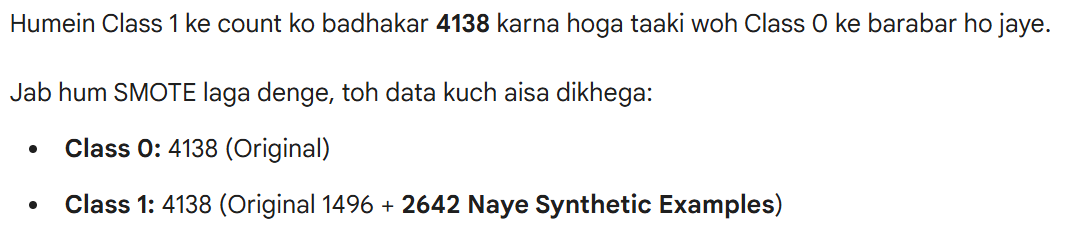

Q: Agar hum SMOTE use karne ke bajaye, bas un 1496 purane examples ko hi baar-baar copy-paste karke 4138 bana dete (jise Simple Oversampling kehte hain), toh kya nuksaan ho sakta tha?



ANSWER: Jab model sirf purane examples ko **"ratta maar"** leta hai (memorize kar leta hai) lekin naye data par fail ho jata hai, wahi **overfitting** hai.

**Copy-Paste (Simple Oversampling):** Yeh waisa hi hai jaise aapne ek hi answer ko 10 baar likh kar yaad kar liya. Model ko wahi exact values baar-baar dikhengi, toh woh unhe yaad kar lega par **pattern nahi samjhega.**

**SMOTE:** Yeh thoda smart hai. Yeh purane data ke aas-paas naye points banata hai.

Example: Agar ek data point "Salary: 50k, Age: 25" hai, toh SMOTE shayad "Salary: 49k, Age: 26" jaisa ek naya example bana dega.

Isse model ko "exact values" nahi milti, toh usse majbooran pattern (yaani concept) seekhna padta hai.

In [48]:
smote = SMOTE(random_state=42)
x_train_smote , y_train_smote= smote.fit_resample(x_train, y_train)

In [49]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


# Machine Learning Model Evaluations and Predictions 🤖

## Training and Evaluating Support Vector Machine (SVM) Model 

In [50]:
model_svc = SVC(random_state=42)
model_svc.fit(x_train_smote , y_train_smote)
accuracy_svc = model_svc.score(x_test , y_test)
print("SVM accuracy is:", accuracy_svc)

SVM accuracy is: 0.7629524485450674


## Training and Evaluating Random Forest Model 🌲

In [51]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train_smote, y_train_smote)

accuracy_rf = model_rf.score(x_test, y_test)
print("Random Forest accuracy is:", accuracy_rf)

Random Forest accuracy is: 0.7750177430801988


# Report Cards of model 
"Best Model" select karne ke liye sirf Accuracy dekhna kaafi nahi hota, khaaskar Churn Prediction jaise problems mein.Faisla lene ke liye humein inke "Report Cards" ko thoda aur detail mein dekhna padega  . generate **Classification Report** and  **Confusion Matrix**
Humein khaaskar **Recall aur Precision** par dhyaan dena hoga.

In [52]:
from sklearn.metrics import classification_report

# 1. Random Forest Report
# Pehle predictions nikaalte hain
y_pred_rf = model_rf.predict(x_test) # Dhyan dein: yahan apne Random Forest model ka naam use karein
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

print("-" * 50)

# 2. SVM Report
# Iske predictions (x_test ko scale karna mat bhulna agar scaler alag se define kiya tha)
# Agar pipeline use nahi kiya toh: x_test_scaled = scaler.transform(x_test)
y_pred_svc = model_svc.predict(x_test) 
print("SVM Report:")
print(classification_report(y_test, y_pred_svc))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.56      0.66      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

--------------------------------------------------
SVM Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1036
           1       0.54      0.74      0.62       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



**my main goal of this model:**  churn ko rokna . ess goal ke basic per decision lo 
**precision:** Precision ka seedha matlab hai**: **"Bharosa" (Trustworthiness)**.Jab aapka model kehta hai "Haan, yeh customer Churn karega (chod ke jayega)," toh aap us baat par kitna bharosa kar sakte ho?
**Prediction and precision Dono bohot alag cheezein hain**
**example**: Prediction (Bhavishyavani) = "Kya Hoga?"
Yeh model ka output ya faisla hai.

Aapne subah uth ke phone dekha.

**Weather App ne kaha:** "Aaj Baarish Hogi 🌧️."

Yeh "Prediction" hai. Model ne apna kaam kar diya, usne ek statement de diya.

**Precision (Bharosa) = "Kitna Sach Hai?"**
Yeh model ki reliability ya track record hai.

Ab aap sochte hain: "Yaar, pichli baar bhi isne kaha tha baarish hogi, par dhoop nikli thi."

Agar app ki **Precision 30% hai**, **iska matlab:** "Jab bhi yeh app bolti hai 'Baarish Hogi', toh 100 mein se sirf 30 baar sach mein baarish hoti hai."


## 🎯 Model Evaluation: Understanding Precision

### 🛑 Project Goal
**My Main Goal:** Churn ko rokna (Stop Churn). Humein is goal ke basis par decision lena hai.


---

### 🔍 Precision vs. Prediction
Bohot log in dono mein confuse hote hain, par **Prediction** aur **Precision** dono bohot alag cheezein hain.

#### 1. Prediction (Bhavishyavani) = "Kya Hoga?"
Yeh model ka **output** ya **faisla** hai.
* **Example:** Aapne subah uth ke phone dekha.
* **Weather App ne kaha:** *"Aaj Baarish Hogi 🌧️."*
* Yeh **"Prediction"** hai. Model ne apna kaam kar diya, usne ek statement de diya.

#### 2. Precision (Bharosa) = "Kitna Sach Hai?"
Yeh model ki **reliability** ya **track record** hai.
> **Definition:** Precision ka seedha matlab hai: **"Bharosa" (Trustworthiness)**.

* Ab aap sochte hain: *"Yaar, pichli baar bhi isne kaha tha baarish hogi, par dhoop nikli thi."*
* **Scenario:** Agar app ki **Precision 30%** hai, iska matlab: *"Jab bhi yeh app bolti hai 'Baarish Hogi', toh 100 mein se sirf 30 baar sach mein baarish hoti hai."*

---
**Mesurment value of precision:** if outof 100 ,  30time rain happend that means preccision is 0.3 or 30%

### 💡 Applying to Churn Project
Jab aapka model kehta hai **"Haan, yeh customer Churn karega (chod ke jayega),"** toh aap us baat par kitna bharosa kar sakte hain?

* Agar **Precision High** hai: Model ne "Churn" bola hai toh darna padega, customer sach mein ja sakta hai.
* Agar **Precision Low** hai: Model bas tukka maar raha hai, zaroori nahi customer jaye.

## Accuracy and MSE
**Accuracy kya hai? (Report Card 📊)**
Aapke code mein 0.76 (ya 76%) aaya hai. Iska matlab hai aapke model ka Report Card.

Agar aapne model ko 100 naye customers dikhaye, toh usne 76 customers ke baare mein sahi bataya (ki woh Churn karenge ya nahi) aur 24 baar galti ki.

Isse kya hota hai? Isse humein bharosa milta hai ki model kitna reliable hai. Jitni zyada accuracy, utna behtar.


**MSE kya hota hai? (Nishane ki Doori 🎯)**
MSE ka full form hai Mean Squared Error. Yeh accuracy ka ulta nahi hai, balki galti naapne ka ek alag tarika hai. Yeh dekhta hai ki aapka andaaza (prediction) asli answer se kitna door tha.

**Example:** Agar asli price ₹100 thi aur model ne ₹90 bataya, toh doori (error) ₹10 hui. MSE inn galtiyon ka hisaab rakhta hai.


**Machine Learning mein problems do tarah ki hoti hain:**

**Classification (Aapka Case):** Jab jawab Categories mein ho (Jaise: Pass/Fail, Churn/No-Churn, Cat/Dog). Yahan humein bas yeh jaanna hai ki jawab "Sahi" hai ya "Galat". Isliye Accuracy use karte hain.

**Regression:** Jab jawab Numbers mein ho (Jaise: Salary kitni hogi? Temperature kitna hoga?). Wahan "Sahi/Galat" nahi hota, wahan "Kitna Kareeb" hota hai. Wahan hum MSE use karte hain.

Churn prediction mein humara main goal yahi hota hai ki hum un logon ko miss na karein jo jane wale hain, taaki hum unhein koi offer dekar rok sakein. Isliye is case mein **Recall** sabse important **metric** ban jata hai, **aur SVM yahan jeet raha hai.**

#### how to decide which algorithm is best for model 
Ek single metric kabhi bhi puri picture nahi dikha sakta. "Best" algorithm dhundna hamesha context par depend karta hai.

Hum dekhein ki Regression (numbers) aur Classification (categories) ke liye kaunse alag-alag metrics "King" hote hain?



# 📝 Recall (Machine Learning) - Short Notes

### 1. Aasaan Bhasha mein (Definition)
Recall humein batata hai ki **jo cheezein humein dhundni thi, unmein se humne kitni "pakad" li aur kitni humse "miss" ho gayi.**
> Iska focus **"Coverage"** par hota hai.

---

### 2. Formula
$$Recall = \frac{\text{True Positives (Sahi Pakde)}}{\text{True Positives} + \text{False Negatives (Jo Miss ho gaye)}}$$

* **Numerator:** Kitne sahi identify kiye.
* **Denominator:** Asliyat mein total kitne hone chahiye the.

---

### 3. Real-Life Example (Yaad rakhne ke liye) 🎣
* **Goal:** Taalab mein **10 Sharks** 🦈 pakadni hain.
* **Result:** Aapne **8** pakdi, **2** chhoot gayi.
* **Calculation:**
    $$\frac{8}{10} = 0.8 \text{ ya } 80\% \text{ Recall}$$
* **Key Point:** Jitni kam sharks chhootengi (*False Negatives* kam honge), utna **Recall** zyada hoga.

---

### 4. Iska Matlab Kya Hua?
* **High Recall (e.g., 90-100%):** Iska matlab tumne zyadatar target cheezein dhoond li hain. ✅
* **Low Recall (e.g., 20-30%):** Iska matlab tum bahut saari important cheezein **miss** kar rahe ho. ⚠️

## ⚖️ Model Comparison: Recall (Miss Rate)

Humara goal **Churn** (jaane wale customers) ko pakadna hai, isliye **Recall** sabse zaroori hai.

* ❌ **Random Forest:** Iska recall kam tha. Isne **40%** customers ko miss kar diya. (Yeh bahut zyada hai!)
* ✅ **SVM:** Isne behtar perform kiya. Sirf **26%** customers miss hue.

### 🏆 Conclusion
Isiliye humne **SVM** ko winner choose kiya kyunki yeh "Risk" (nuksaan) ko behtar control kar raha hai.

# F1 SCORE
F1-Score tab kaam aata hai jab **humein samajh nahi aa raha ho ki Precision zyada important hai ya Recall.** Ye dono ke beech ka Balance (Samjhauta) banata hai.

# ⚖️ F1-Score: The Balancer

### 1. Iski Zaroorat Kyun Padi? (The Problem) 🤔
Imagine karein aapke paas do models hain:
* **Model A:** Recall bahut high hai (sabko pakad raha hai), lekin Precision bahut ganda hai (sabko spam bhej raha hai).
* **Model B:** Precision bahut high hai (sahi nishana), lekin Recall bahut kam hai (bahut log chhoot rahe hain).

> **Problem:** Ab hum confuse hain ki kis model ko "Best" bole?

Yahan **F1-Score** aata hai. Ye dono metrics ko milakar **ek single number** de deta hai taaki comparison aasaan ho jaye.

---

### 2. Formula (The Math) 🧮
Ye simple average (Mean) nahi leta, balki **Harmonic Mean** leta hai.

$$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

---

### 3. Ye "Harmonic Mean" hi kyun? (Why not Average?)
**Scenario:** Maan lo **Precision = 0** (Model ekdum bekaar hai) aur **Recall = 100** (Sabko select kar liya).

| Method | Calculation | Result | Meaning |
| :--- | :--- | :--- | :--- |
| **Simple Average** | $\frac{0 + 100}{2}$ | **50%** | Lagega model "Thik-thak" hai. (Jabki wo bekaar hai!) ❌ |
| **F1-Score** | $2 \times \frac{0 \times 100}{0 + 100}$ | **0** | Ye turant bata dega ki model **Fail** hai. ✅ |

**Conclusion:** Isliye F1-Score **sakht (strict)** hota hai. Agar Precision ya Recall mein se koi ek bhi kharaab hua, toh F1-Score gir jayega.

# diffrence 
| **Concept** | **Saral Bhasha Mein (Meaning)** | **Churn Prediction Example** 📉 |
| :--- | :--- | :--- |
| **Precision** | **"Bharosa"**<br>Jab model ne kaha "Yeh customer jayega", toh kya wo sach mein gaya? Ya humne galti ki? | **Ghalat ilzaam se bachna:**<br>Humne jin customers ko 'High Risk' bola, unmein se **kitne sach mein chhod kar gaye?**<br>*(Agar Precision kam hai, toh hum khush (loyal) customers ko bhi faltu mein discount de denge, jo ki company ka nuksaan hai).* |
| **Recall** | **"Pakad"**<br>Jo log sach mein jane wale they, unmein se humne kitno ko dhoondh nikala? | **Koi chhoot na jaye:**<br>Jo customers sach mein service band karne wale they, unmein se humne **kitno ko pehle hi pakad liya?**<br>*(Agar Recall kam hai, toh customer chup-chap chhod ke chala jayega aur humein pata bhi nahi chalega).* |
| **F1-Score** | **"Sahi Balance"**<br>Precision aur Recall ke beech ka samjhauta. | **Effective Strategy:**<br>Kya model ne zyadatar jane wale customers ko pakda **aur** saath hi saath wafadaar customers ko pareshan karne se bacha? |

# 🎯 Precision vs F1-Score: Kisme Kitna Bharosa?

### 1. "Baat" par Bharosa (Trust in Prediction) = Precision
Jab model kehta hai: *"Yeh Class 1 hai"*, tab aap sochte hain: *"Kya main iski baat maanu?"*

> **Yahi Precision hai.**
>
> > **Agar hum kisi "Specific Prediction" par bharosa karne ki baat karein, toh wo seedha-seedha Precision hi hai.**

Aapke SVM model mein **Class 1 ki Precision 0.54** hai.
Iska matlab: Jab yeh model kehta hai "Class 1", toh sirf **54% chance** hai ki wo sahi bol raha hai. *(Yahan bharosa kam hai)*.

---

### 2. "Kaam" par Bharosa (Trust in Capability) = F1-Score ⚖️
Jab aap pure model ko hire karne ki sochte hain, tab aap sochte hain: *"Kya yeh model mera kaam sambhal payega?"*

> **Yahi F1-Score hai.**

Yeh **Precision** (Sahi bolna) aur **Recall** (Cheezein na chhootna) dono ka nichod (summary) hai.

---

### 👮‍♂️ Ek Mazedaar Example: "Chaukidaar" (Watchman)

Imagine kijiye aapke paas do Chaukidaar (Models) hain:

#### **Chaukidaar A** (High Precision, Zero Recall)
* Yeh din bhar chup rehta hai. Kabhi kisi chor ko nahi pakadta.
* Lekin saal mein ek baar agar isne kaha **"Chor!"**, toh pakka chor hoga.
* **Precision:** 100% (Iski baat patthar ki lakeer hai).
* **Lekin F1 Score:** Bahut kharab (Kyunki isne saare chor jaane diye).
* *Kya aap is "Model" par bharosa karenge puri security ke liye? Nahi na?*

#### **Chaukidaar B** (High Recall, Zero Precision)
* Yeh har aate-jaate aadmi ko **"Chor! Chor!"** bolta rehta hai.
* Isne aaj tak koi chor miss nahi kiya (sabko pakad liya).
* **Recall:** 100%.
* **Lekin F1 Score:** Bahut kharab (Kyunki iski baat ka koi value nahi hai).

---

> **Conclusion:**
> "Yeh model na toh Chaukidaar A jaisa bekaar hai, na Chaukidaar B jaisa. Yeh **overall 61-62%** theek kaam kar raha hai."
>
> 


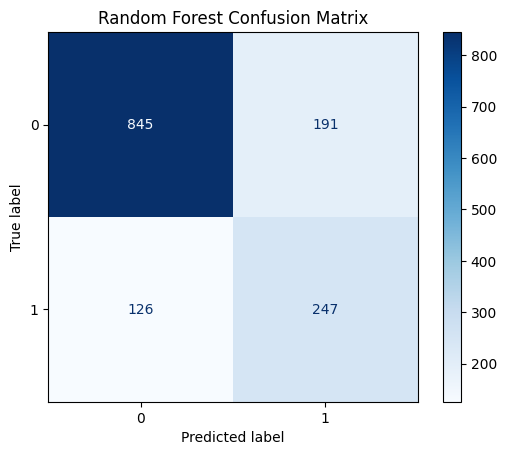

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Random Forest Confusion Matrix
# Pehle matrix calculate karte hain
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Phir usse plot karte hain
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp.plot(cmap='Blues') # 'Blues' color theme hai
plt.title("Random Forest Confusion Matrix")
plt.show()

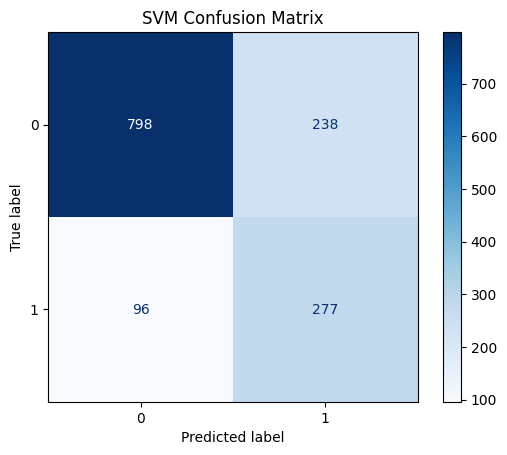

In [54]:
# 1. SVM Confusion Matrix calculate karein
# (Agar aapne x_test_scaled banaya hai, toh x_test ki jagah wo use karein)
y_pred_svc = model_svc.predict(x_test)

cm_svc = confusion_matrix(y_test, y_pred_svc)

# 2. Plot karein
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=[0, 1])
disp_svc.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

# Visualizing Feature Importance from Random Forest 🌲📊

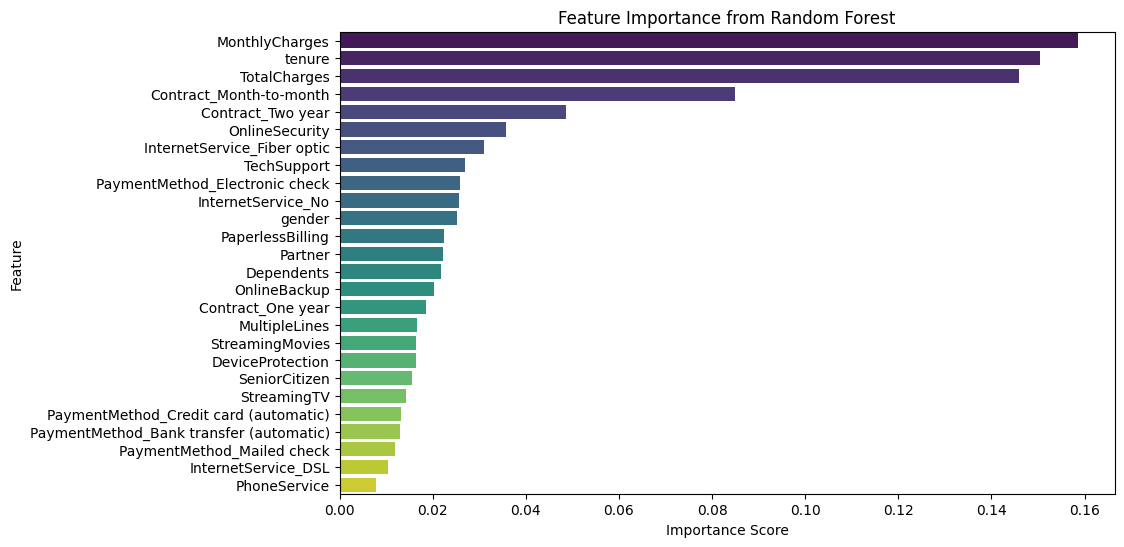

In [55]:
# Get feature importance scores
feature_importance = model_rf.feature_importances_  # Attribute

feat_importance_df = pd.DataFrame({'Feature': x_train_smote.columns, 'Importance': feature_importance})

# Sort by importance
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance_df['Importance'], y=feat_importance_df['Feature'], palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Saving the Random Forest Model using Pickle 💾🌲

In [56]:
#pickle.dump(model_rf, open("random_forest_model.pkl", "wb"))